In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa, librosa.display

import tensorflow as tf 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, GRU, Input, Conv1D, MaxPooling1D
from sklearn.metrics import confusion_matrix, classification_report

## DATALOADER

In [4]:
X_train = np.load('/content/gdrive/MyDrive/data/Augmented1/X_train.npy')
y_train = np.load('/content/gdrive/MyDrive/data/Augmented1/y_train.npy')
X_test = np.load('/content/gdrive/MyDrive/data/Augmented1/X_test.npy')
y_test = np.load('/content/gdrive/MyDrive/data/Augmented1/y_test.npy')
X_val = np.load('/content/gdrive/MyDrive/data/Augmented1/X_val.npy')
y_val = np.load('/content/gdrive/MyDrive/data/Augmented1/y_val.npy')

In [5]:
X_train[0].shape

(98,)

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(16893, 98) (16893, 2)
(2109, 98) (2109, 2)
(2088, 98) (2088, 2)


## CRNN - Review Later

In [7]:
from keras.layers import Input, LSTM, GRU, Dense, Embedding, Conv1D, MaxPooling1D, Activation
from keras.layers import Reshape, Softmax, Permute, Multiply, dot, concatenate
from keras.layers import BatchNormalization
from keras.models import Model

inputs = Input(shape=(98,1))
conv1 = Conv1D(64, 5, activation='relu')(inputs)
pool1 = MaxPooling1D(2)(conv1)
conv2 = Conv1D(32, 5, activation='relu')(pool1)
pool2 = MaxPooling1D(2)(conv2)
conv3 = Conv1D(16, 5, activation='relu')(pool2)
pool3 = MaxPooling1D(2)(conv3)

gru1 = GRU(128, return_sequences=True)(pool3)
lstm1 = LSTM(32)(gru1)

q = Dense(128)(lstm1)
k = Dense(128)(lstm1)
v = Dense(128)(lstm1)

q = Reshape((1, 128))(q)
k = Reshape((1, 128))(k)
v = Reshape((1, 128))(v)

attention = dot([q, k], axes=[2, 2])
attention = Activation('softmax')(attention)

output = dot([attention, v], axes=[2, 1])
output = Reshape((128,))(output)

output = Dense(2, activation='softmax')(output)

model = Model(inputs=inputs, outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(amsgrad=True), loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 98, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 94, 64)       384         ['input_1[0][0]']                
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 47, 64)       0           ['conv1d[0][0]']                 
                                                                                                  
 conv1d_1 (Conv1D)              (None, 43, 32)       10272       ['max_pooling1d[0][0]']          
                                                                                              

In [8]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 120, shuffle = False)

Epoch 1/120
528/528 [==============================] - 22s 11ms/step - loss: 0.4421 - accuracy: 0.7705 - val_loss: 0.2395 - val_accuracy: 0.9133
Epoch 2/120
528/528 [==============================] - 6s 11ms/step - loss: 0.2097 - accuracy: 0.9207 - val_loss: 0.2107 - val_accuracy: 0.9167
Epoch 3/120
528/528 [==============================] - 5s 9ms/step - loss: 0.1744 - accuracy: 0.9333 - val_loss: 0.1882 - val_accuracy: 0.9310
Epoch 4/120
528/528 [==============================] - 5s 9ms/step - loss: 0.1582 - accuracy: 0.9402 - val_loss: 0.1895 - val_accuracy: 0.9320
Epoch 5/120
528/528 [==============================] - 6s 11ms/step - loss: 0.1433 - accuracy: 0.9472 - val_loss: 0.1921 - val_accuracy: 0.9320
Epoch 6/120
528/528 [==============================] - 5s 9ms/step - loss: 0.1314 - accuracy: 0.9512 - val_loss: 0.1764 - val_accuracy: 0.9377
Epoch 7/120
528/528 [==============================] - 6s 11ms/step - loss: 0.1237 - accuracy: 0.9538 - val_loss: 0.1706 - val_accuracy: 0

In [9]:
model.save("/content/gdrive/MyDrive/Models/CRNNGRULSTMWithAttentionWithoutDenseV3.h5")
print("Model Score: \n")
score = model.evaluate(X_test, y_test)
print(score)

Model Score: 

66/66 [==============================] - 0s 4ms/step - loss: 0.1927 - accuracy: 0.9772
[0.19267281889915466, 0.9772403836250305]


##METRICS

In [ ]:
pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 KB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9470 sha256=d29df6cf6edd556985628bc35606f34c326481d81c1a663141c90e825f7aba37
  Stored in directory: /root/.cache/pip/wheels/aa/0a/0f/0775c812151040fb695c0890d902810a9d69e1db50181e5328
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.50-py3-none-any.whl size=320515 sha256=5d1c192a4ab61487912ee168045cfb8b71627224858f771e43810f469af3caf1
  Stored in directory: /root/.cache/pip/wheels/d2/50/d6/95e7c7713c3c1609e30a394d7431ffc11e4f7deb82d13ffceb
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl siz

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

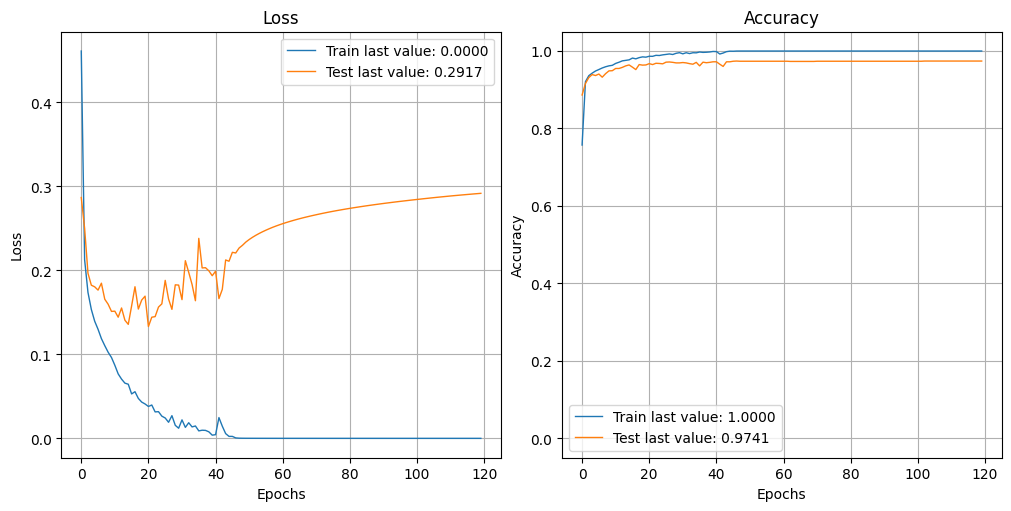

In [ ]:
from plot_keras_history import show_history, plot_history
plot_history(history)

In [ ]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Model Classification Report: 

66/66 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1049
           1       0.98      0.98      0.98      1060

    accuracy                           0.98      2109
   macro avg       0.98      0.98      0.98      2109
weighted avg       0.98      0.98      0.98      2109

Confusion matrix, without normalization
[[1028   21]
 [  16 1044]]


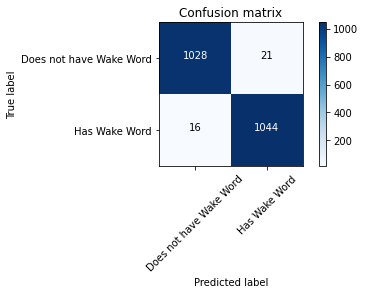

In [ ]:
print("Model Classification Report: \n")
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(classification_report(np.argmax(y_test, axis=1), y_pred))
plot_confusion_matrix(cm, classes=["Does not have Wake Word", "Has Wake Word"])

##PREDICTION & LATENCY


In [ ]:
pip install spafe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 KB 3.5 MB/s eta 0:00:00


In [ ]:
import spafe
from spafe.features.lfcc import lfcc
import pywt

In [ ]:
def predict(audio):
  audio_data, sr = librosa.load(audio)

  wavelet = 'db4'
  level = 4
  coeffs = pywt.wavedec(audio_data, wavelet, level=level)
  threshold = np.median(np.abs(coeffs[-level])) / 0.6745
  for i in range(1, len(coeffs)):
    coeffs[i] = pywt.threshold(coeffs[i], threshold)
  denoised_audio = pywt.waverec(coeffs, wavelet)

  lfccs  = lfcc(denoised_audio, fs = sr, num_ceps=13)
  lfccs_processed = np.mean(lfccs.T, axis=0) # some pre-processing
  lfccs_new = np.expand_dims(np.asarray(lfccs_processed), axis=0)
  predictions = model.predict(lfccs_new)
  return predictions

In [ ]:
audio_for_pred = "/content/gdrive/MyDrive/Marvin/marvin (170).wav"
print(np.round(predict(audio_for_pred)))

1/1 [==============================] - 0s 40ms/step
[[0. 1.]]


In [ ]:
audio_for_pred = "/content/gdrive/MyDrive/False/yes (824).wav"
print(np.round(predict(audio_for_pred)))

1/1 [==============================] - 0s 154ms/step
[[1. 0.]]
